## 1. Extracting trajectory data from a public database (FlightAware)
#### Input needed:
- valid FlightAware URL for a completed flight [eg. 'https://flightaware.com/live/flight/UAL1895/history/20200224/1225Z/KTPA/KIAH/tracklog']

In [4]:
from fn_FlightAware_TrajData import pyfn_FlightAware_trajectory_extractor
from fn_flight_phases import pyfn_flight_phase

import matplotlib.pyplot as plt

Input: a valid FlightAware URL (FA_URL)

In [5]:
FA_URL = 'https://flightaware.com/live/flight/AAL302/history/20210806/2240Z/KJFK/KLAX/tracklog'

In [6]:
# Extract FlightAware trajectory from the specified URL
traj_mat, Time_s, Latitude, Longitude, Course_deg, TAS_kts, TAS_mph, Altitude_ft, ROCD = pyfn_FlightAware_trajectory_extractor(FA_URL)

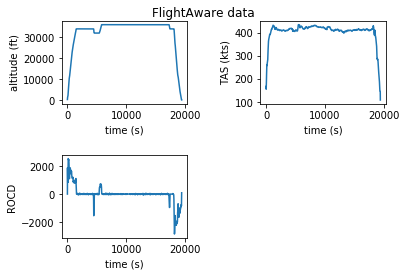

In [7]:
# (a) Plot formatted FlightAware trajectory
plot1 = plt.figure(1)
plt.subplot(2,2,1)
plt.plot(Time_s,Altitude_ft)
plt.xlabel('time (s)')
plt.ylabel('altitude (ft)')

plt.subplot(2,2,2)
plt.plot(Time_s,np.array(list(map(float,TAS_kts))))
plt.xlabel('time (s)')
plt.ylabel('TAS (kts)')

plt.subplot(2,2,3)
plt.plot(Time_s,ROCD)
plt.xlabel('time (s)')
plt.ylabel('ROCD')

plt.tight_layout(pad=2.0)
plt.suptitle('FlightAware data');

## 2. Processing recorded trajetcory data
####    (a) detecting step climb during the cruise phase (multiple altitude levels at cruise)

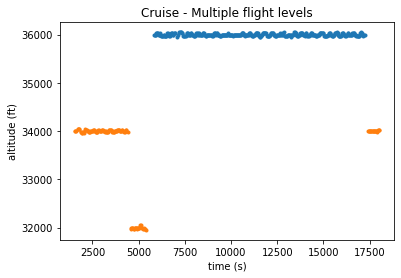

In [8]:
Ix_ToC, Ix_ToD, time_cluster_all, alt_cluster_all, hold_descent_altitudes = pyfn_flight_phase(ROCD, Altitude_ft, Time_s)
# If step climb was detected, plot multiple altitude levels at cruise
N_cruise_clusters = len(alt_cluster_all)
if N_cruise_clusters>1:    
    plot2 = plt.figure(2)
    for ix in range(N_cruise_clusters):
        plt.plot(time_cluster_all[ix],alt_cluster_all[ix],'.')
    plt.xlabel('time (s)')
    plt.ylabel('altitude (ft)')
    plt.title('Cruise - Multiple flight levels')
# Note: Ignore the convergence warnings.

#### 2 (b): Check if the aircraft was held at a constant altitude during descent phase

In [16]:
# Test whether the aircraft was held at a constant altitude during descent for a significant time duration (> 80 sec)
if len(hold_descent_altitudes)>0:
    print('Aircraft was held at a constant level during descent at the following altitude(s) [Units: ft.]:')
    print(hold_descent_altitudes)
else:
    print('"Hold at altitude" not detected during descent')

"Hold at altitude" not detected during descent
